In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("heart.csv")
df.head()#(1 = male; 0 = female)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploratory data analysis

In [3]:
pd.set_option("display.float","{:.1f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.4,0.7,1.0,131.6,246.3,0.1,0.5,149.6,0.3,1.0,1.4,0.7,2.3,0.5
std,9.1,0.5,1.0,17.5,51.8,0.4,0.5,22.9,0.5,1.2,0.6,1.0,0.6,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


In [4]:
df.shape

(303, 14)

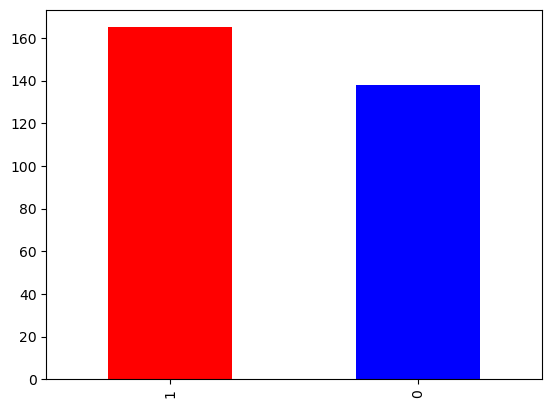

In [4]:
df.target.value_counts().plot(kind="bar",color=["red","blue"])
plt.show()

In [6]:
print(df.target.value_counts())#1=With Heart Disease,0=Without Heart Disease

1    165
0    138
Name: target, dtype: int64


In [6]:
#Missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
cat_val=[]
con_val=[]

for column in df.columns:
    
    print(f"{column}:{df[column].unique()}")
    
    if len(df[column].unique())<=10:#Looks for the lenght of the unique values in the column and comparies if its length is <=to 10
        cat_val.append(column)#if yes it is catagorical data
        
    else:
        con_val.append(column)#if no it is continuious data
        
        
print("cat_val=",cat_val)
print("con_val=",con_val)

age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex:[1 0]
cp:[3 2 1 0]
trestbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs:[1 0]
reste

sex: Sex (male/female)
cp: Chest Pain type (typical angina/atypical angina/non-anginal pain/asymptomatic)
fbs: Fasting blood sugar level (> 120 mg/dl or not)
restecg: Resting electrocardiographic results (normal/abnormality in ST-T wave/ showing probable or definite left ventricular hypertrophy)
exang: Exercise induced angina (yes/no)
slope: Slope of the peak exercise ST segment (upsloping/flat/downsloping)
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thallium stress test (normal/fixed defect/reversible defect)
target: Presence of heart disease (1=yes, 0=no)
age: Age of the patient in years
trestbps: Resting blood pressure (in mm Hg) when the patient was admitted to the hospital
chol: Serum cholesterol level (in mg/dl)
thalach: Maximum heart rate achieved during the exercise test
oldpeak: ST depression induced by exercise relative to rest

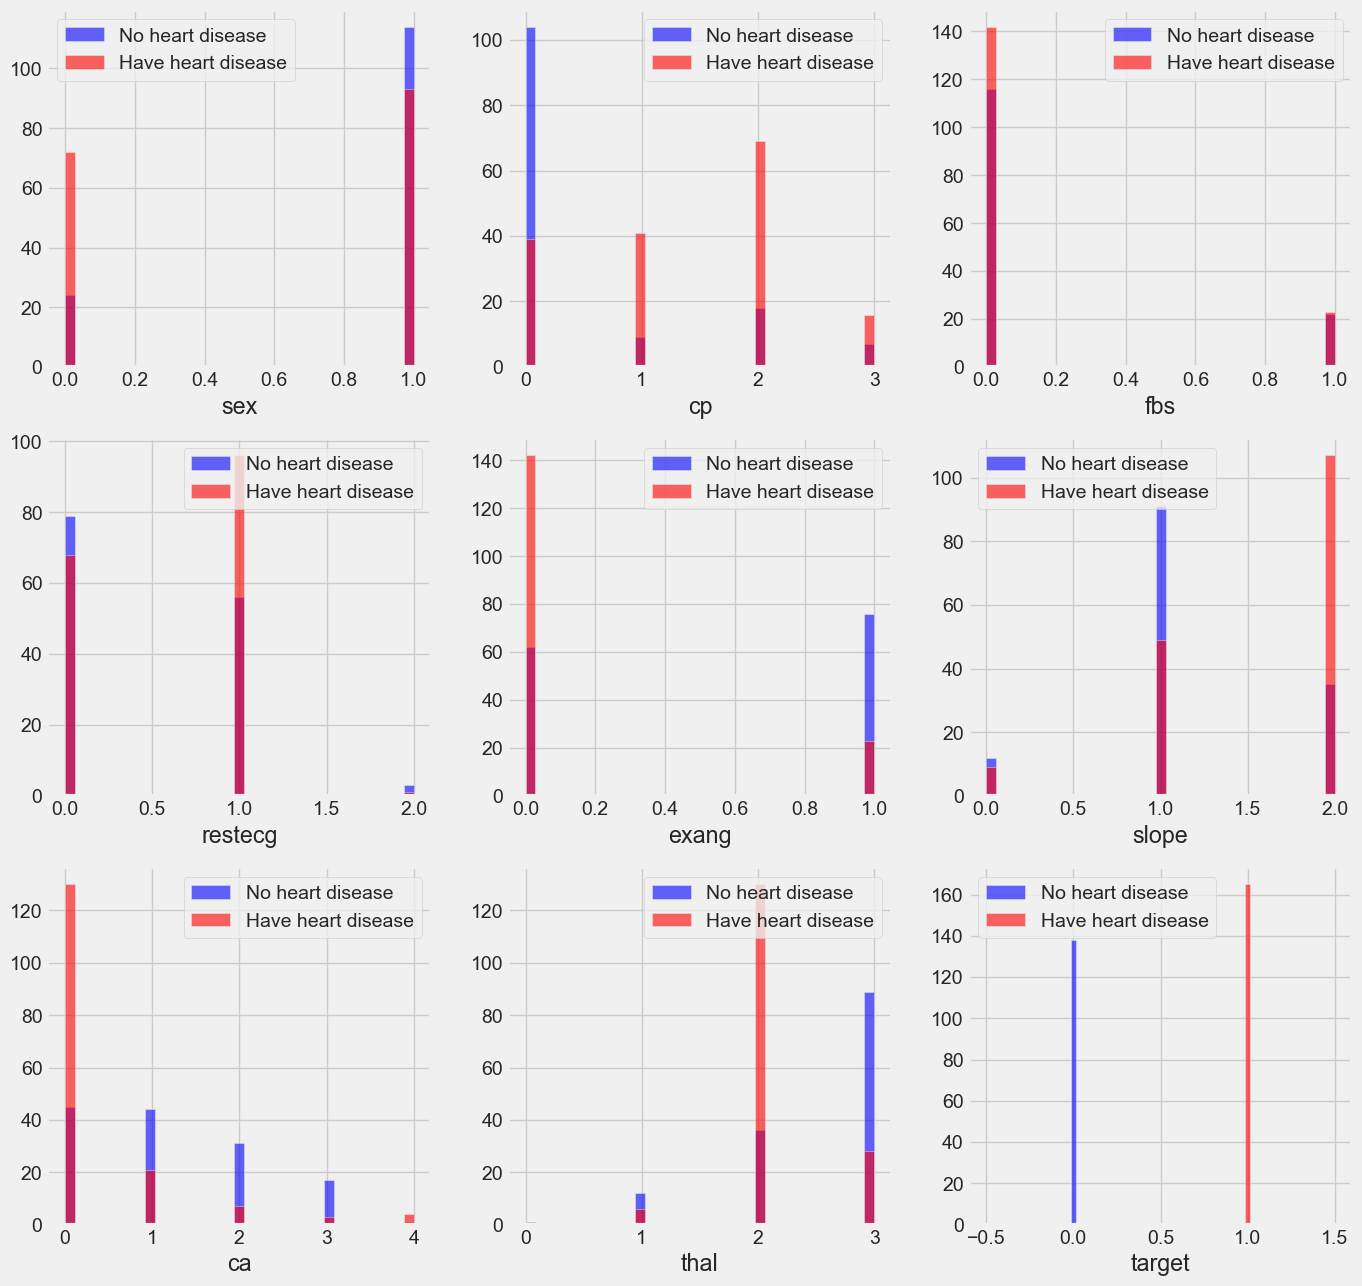

In [8]:
plt.figure(figsize=(15,15))

for i,column in enumerate(cat_val,1):
    
    plt.subplot(3,3,i)
    df[df["target"]==0][column].hist(bins=35,color="blue",label="No heart disease",alpha=0.6)##data split into sets with 35 counts each
    df[df["target"]==1][column].hist(bins=35,color="red",label="Have heart disease",alpha=0.6)#alpha determines the transparancy of the bars in the graph with respect to the plot grid
    
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

*cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
*restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
*exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
*slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
*ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
*thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

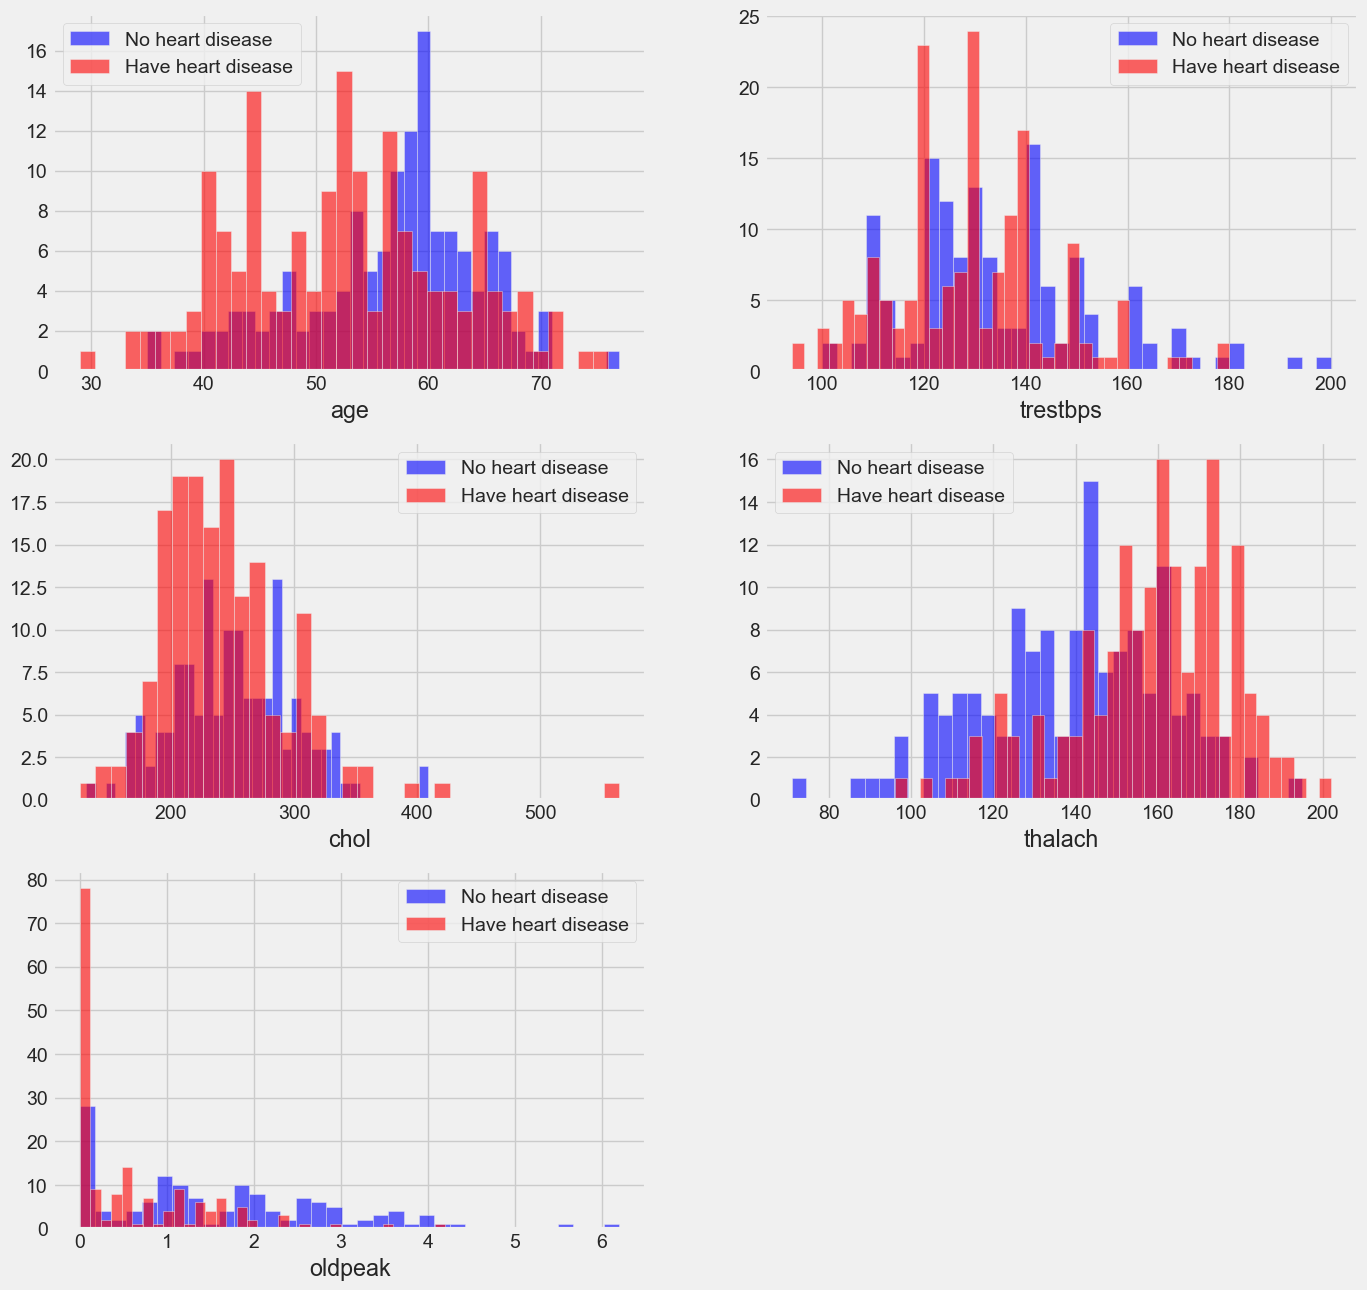

In [9]:
plt.figure(figsize=(15,15))

for i,column in enumerate(con_val,1):
    
    plt.subplot(3,2,i)
    df[df["target"]==0][column].hist(bins=35,color="blue",label="No heart disease",alpha=0.6)
    df[df["target"]==1][column].hist(bins=35,color="red",label="Have heart disease",alpha=0.6)
    
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

*trestbps: resting blood pressure anything above 130-140 is generally of concern
*chol: greater than 200 is of concern.
*thalach: People with a maximum of over 140 are more likely to have heart disease.
*the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

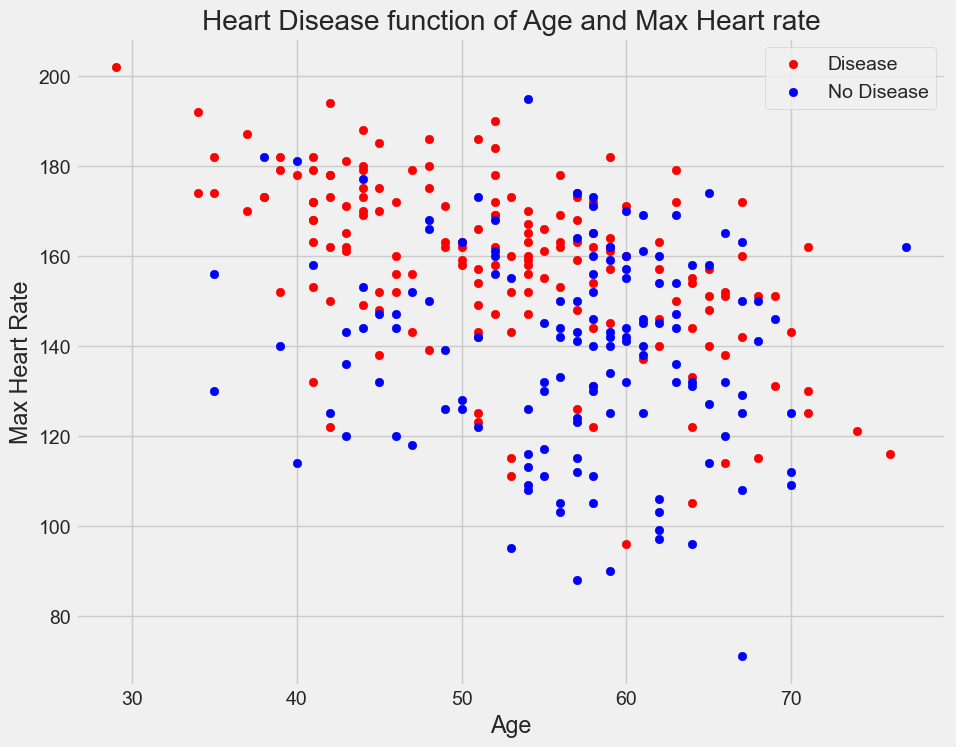

In [10]:
plt.figure(figsize=(10,8))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c="blue")

plt.title("Heart Disease function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

From the data above:
    * Likelyhood of getting heart disease is less when heart rate is less than 120
    
    * ppl with high heart rate(>140) and between age 35 to 70 are likely to get heart disease

Correlation Matrix

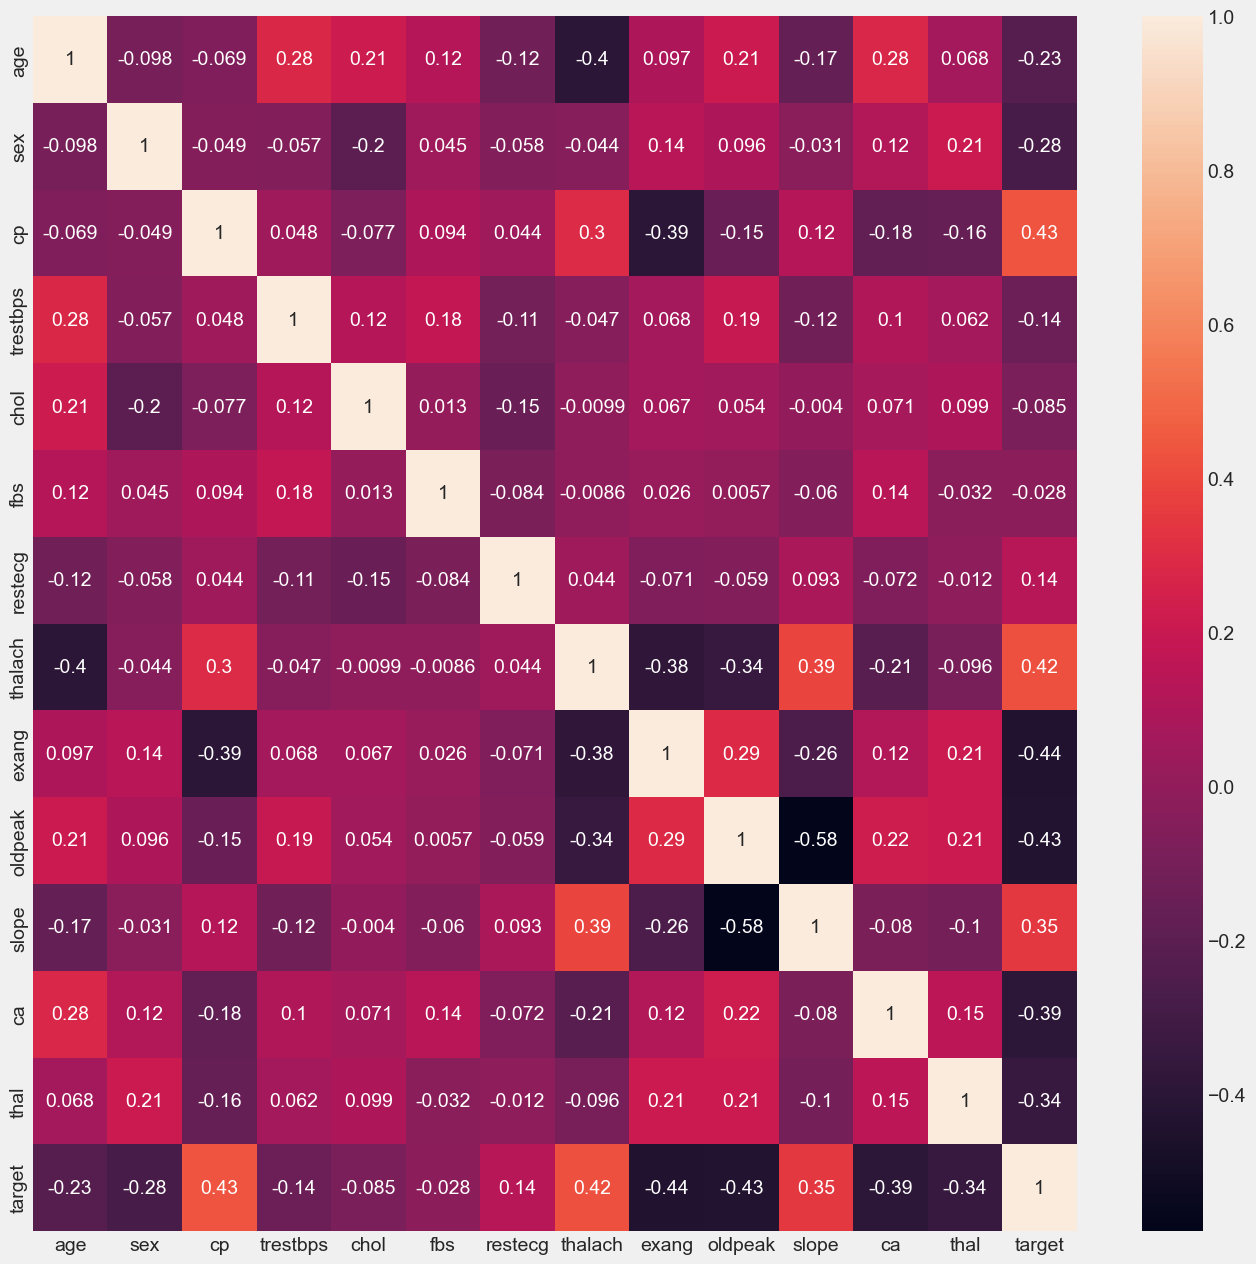

In [11]:
cm=df.corr()
fig,ax = plt.subplots(figsize=(15,15))

ax=sns.heatmap(cm,annot=True)

<AxesSubplot:title={'center':'Correlation with target'}>

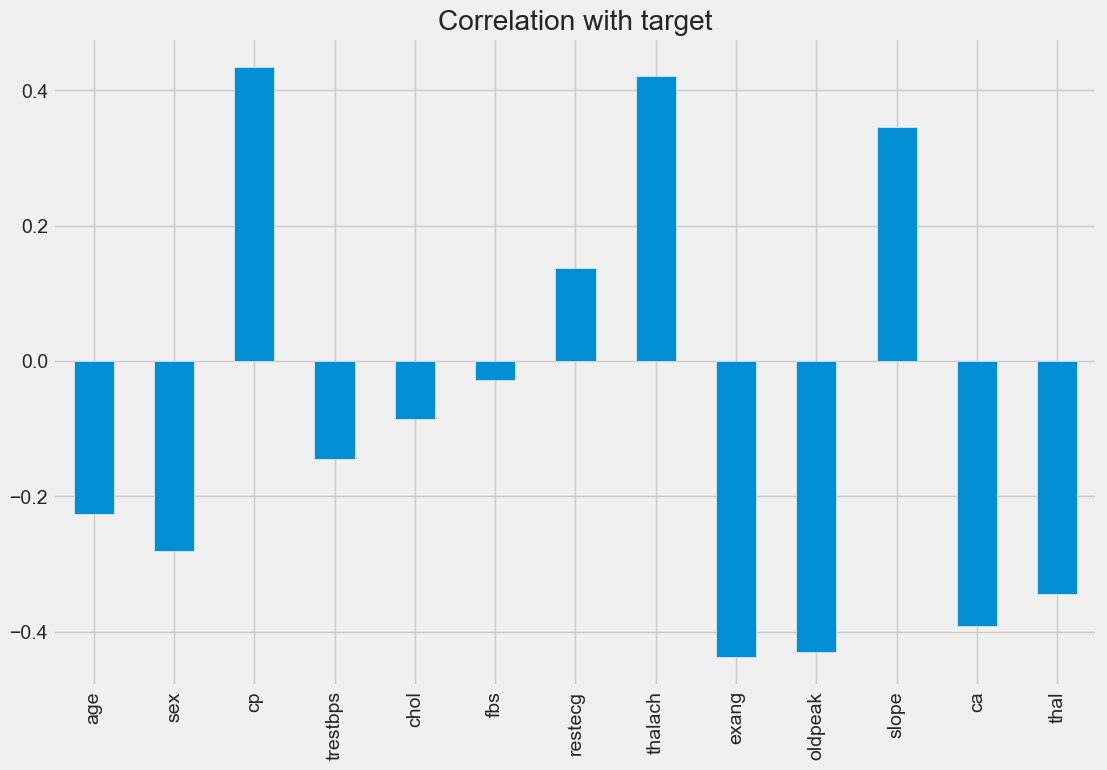

In [12]:

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

cholestrol (chol)and fasting blood sugar(fbs) are the 2 param that do not correlate much

In [13]:
cat_val.remove('target')


df1=pd.get_dummies(df,columns=cat_val)


In [14]:
from sklearn.preprocessing import StandardScaler#Feature scaling

ss=StandardScaler()

col_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df1[col_to_scale]=ss.fit_transform(df1[col_to_scale])

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Precision: Precision measures the proportion of predicted positive cases that were actually positive. It is calculated as:

Precision = TP / (TP + FP)

where TP is the number of true positives, and FP is the number of false positives.

Recall: Recall measures the proportion of actual positive cases that were correctly identified by the model. It is calculated as:

Recall = TP / (TP + FN)

where FN is the number of false negatives.

F1 score: F1 score is the harmonic mean of precision and recall, and provides a balanced measure of the two metrics. It is calculated as:

F1 score = 2 * Precision * Recall / (Precision + Recall)

Support: Support is simply the number of observations in each class. It can be used to identify imbalanced classes in the data, which can affect the performance of the model.

These metrics can be calculated for each class in a multi-class classification problem by taking a weighted average of the values for each class, or by calculating them separately for each class and then averaging them.

Note that in some cases, precision and recall may be more appropriate metrics than accuracy for evaluating the performance of a classification model. This is especially true when the classes are imbalanced, as accuracy can be misleading in such cases.



In [16]:
from sklearn.model_selection import train_test_split

X = df1.drop('target', axis=1)
y = df1.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')#The "liblinear" solver is a coordinate descent solver that is suitable for small to medium-sized datasets. It is a good choice when the number of features is large, and it can handle both L1 and L2 regularization. L1 regularization is used to shrink some of the coefficients to zero, resulting in a sparse model, while L2 regularization is used to shrink all of the coefficients towards zero, resulting in a more stable model.
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



Train/Test result:
True Positive (TP): The model correctly predicted the positive class. In this case, the model correctly predicted 104/45 positive cases.
False Positive (FP): The model predicted the positive class, but the actual class was negative. In this case, the model incorrectly predicted 17/7 negative cases as positive.
False Negative (FN): The model predicted the negative class, but the actual class was positive. In this case, the model incorrectly predicted 11/5 positive cases as negative.
True Negative (TN): The model correctly predicted the negative class. In this case, the model correctly predicted 80/34 negative cases.

In [19]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()
m.fit(X_train, y_train)

print_score(m, X_train, y_train, X_test, y_test, train=True)
print_score(m, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.84      0.78       0.78          0.79
recall     0.83  0.74      0.78       0.78          0.78
f1-score   0.77  0.79      0.78       0.78          0.78
support   41.00 50.00      0.78      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



In [24]:
from sklearn.ensemble import RandomForestClassifier
rm= RandomForestClassifier(n_estimators=11)
rm.fit(X_train, y_train)

print_score(rm, X_train, y_train, X_test, y_test, train=True)
print_score(rm, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.82      0.81       0.81          0.81
recall     0.78  0.84      0.81       0.81          0.81
f1-score   0.79  0.83      0.81       0.81          0.81
support   41.00 50.00      0.81      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]

